# Basics of logistic regression


### Logistic Regression was used in the biological sciences in early twentieth century. 

### It was then used in many social science applications. Logistic Regression is used when the dependent variable(target) is categorical.

<img src='../logistic.JPG'>


For example,
* To predict whether an email is spam (1) or (0)
* Whether the tumor is malignant (1) or not (0)

##### Consider a scenario where we need to classify whether an email is spam or not. 

* If we use linear regression for this problem, there is a need for setting up a threshold based on which classification can be done. 
* Say if the actual class is malignant, predicted continuous value 0.4 and the threshold value is 0.5, the data point will be classified as not malignant which can lead to serious consequence in real time.


* From this example, it can be inferred that linear regression is not suitable for classification problem. 


* Linear regression is unbounded, and this brings logistic regression into picture. Their value strictly ranges from 0 to 1.

## Import the relevant libraries

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [4]:
raw_data = pd.read_csv('2.01. Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
5,1755,Yes
6,1775,Yes
7,1887,Yes
8,1893,Yes
9,1580,No


In [5]:
# Replace all No entries with 0, and all Yes entries with 1
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
5,1755,1
6,1775,1
7,1887,1
8,1893,1
9,1580,0


## Variables

In [6]:
# Create the dependent and independent variables
y = data['Admitted']
x1 = data['SAT']

## Let's plot the data

### Scatter plot

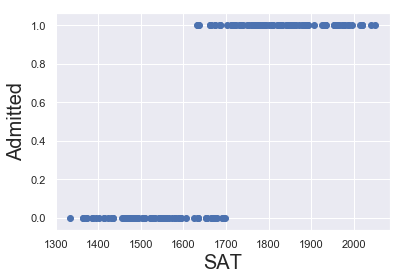

In [7]:
# Create a scatter plot of x1 (SAT, no constant) and y (Admitted)
plt.scatter(x1,y, color='C0')
# Don't forget to label your axes!
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

### Plot with a regression line

C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


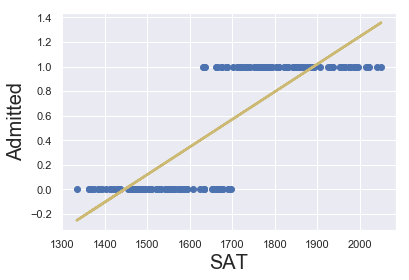

In [8]:
# Create a linear regression on the data in order to estimate the coefficients and be able to plot a regression line
# The data is not linear, so the linear regression doesn't make much sense
x = sm.add_constant(x1)
# I'll call it reg_lin, instead of reg, as we will be dealing with logistic regressions later on
reg_lin = sm.OLS(y,x)
# I'll segment it into regression and fitted regression (results) as I can use the results as an object for some operations
results_lin = reg_lin.fit()

# Create a scatter plot
plt.scatter(x1,y,color = 'C0')
# Plot the regression line. The coefficients are coming from results_lin.params
y_hat = x1*results_lin.params[1]+results_lin.params[0]
plt.plot(x1,y_hat,lw=2.5,color='C8')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

### Plot a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


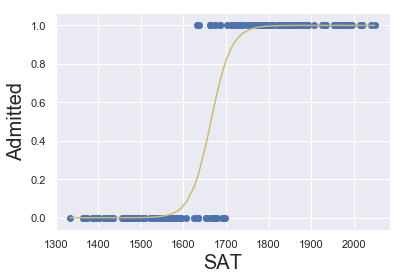

In [9]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


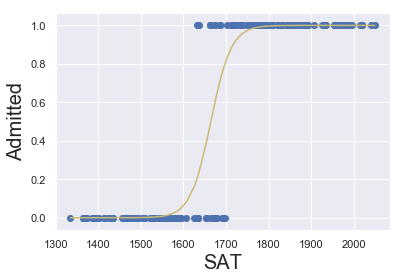

In [9]:
# Creating a logit regression (we will discuss this in another notebook)
reg_log = sm.Logit(y,x)
# Fitting the regression
results_log = reg_log.fit()

# Creating a logit function, depending on the input and coefficients
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

# Sorting the y and x, so we can plot the curve
f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
# Plotting the curve
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

# Assumptions of Logistic Regression are similar to Linear Regression except for Linearity

# Regression Summary

In [10]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Aug 2019   Pseudo R-squ.:                  0.7992
Time:                        06:54:34   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
                                        LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### Likelyhood - 
    In statistics, the likelihood function (often simply called likelihood) expresses how probable a given set of observations are for different values of statistical parameters.[a] It is equal to the joint probability distribution of the random sample evaluated at the given observations, and it is, thus, solely a function of parameters that index the family of those probability distributions
#### Maximum Likelihood Estimation
    Maximum likelihood estimation is a method that determines values for the parameters of a model. The parameter values are found such that they maximise the likelihood that the process described by the model produced the data that were actually observed.
#### LLR p-value
    Significance of model (~0.000x means significant model)
#### Psuedo R-squ.
    Measure of how well the regression is doing

In [14]:
# Making prediction
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

results_log.predict()

array([0.00, 1.00, 1.00, 0.38, 0.05, 0.98, 0.99, 1.00, 1.00, 0.03, 1.00,
       1.00, 0.50, 0.00, 0.77, 1.00, 0.21, 0.22, 0.23, 1.00, 1.00, 1.00,
       0.00, 0.00, 0.91, 1.00, 0.22, 1.00, 1.00, 0.98, 0.00, 0.61, 0.41,
       1.00, 1.00, 1.00, 0.50, 1.00, 0.39, 0.00, 0.04, 0.20, 1.00, 0.00,
       1.00, 0.00, 0.98, 0.00, 0.00, 0.01, 0.01, 1.00, 0.80, 0.01, 1.00,
       0.00, 0.56, 0.95, 0.22, 0.99, 0.01, 0.89, 1.00, 1.00, 0.99, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.89, 0.22, 0.00, 1.00, 1.00, 1.00, 0.00,
       0.49, 1.00, 1.00, 0.01, 1.00, 1.00, 0.65, 1.00, 1.00, 0.00, 1.00,
       0.99, 0.72, 0.60, 0.00, 0.95, 0.91, 0.00, 1.00, 1.00, 0.01, 0.98,
       0.88, 0.99, 0.00, 0.99, 0.03, 0.00, 0.99, 0.99, 1.00, 0.00, 0.00,
       0.04, 0.52, 0.00, 1.00, 0.16, 0.00, 0.92, 0.00, 0.47, 1.00, 1.00,
       0.02, 0.00, 0.00, 1.00, 0.01, 0.96, 0.75, 0.72, 0.94, 0.60, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.08, 0.00, 0.01, 1.00, 0.98, 0.70,
       0.99, 1.00, 0.02, 0.00, 0.00, 0.00, 0.83, 1.

In [15]:
# Actual Values
np.array(data["Admitted"])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [16]:
results_log.pred_table()

array([[67.00, 7.00],
       [7.00, 87.00]])

In [20]:
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted_0','Predicted_1']
cm_df = cm_df.rename(index={0:'Actual_0',1:'Actual_1'})
cm_df

,Predicted_0,Predicted_1
Actual_0,67.0,7.0
Actual_1,7.0,87.0


In [21]:
cm=np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9166666666666666